In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

df = pd.read_csv("../data/clean/retail_clean.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [2]:
# ما روی تراکنش‌های مالی تمرکز می‌کنیم
X = df[['Quantity', 'TotalPrice']]

In [3]:
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.01,  # 1% از داده‌ها غیرعادی در نظر گرفته می‌شوند
    random_state=42
)
iso_forest.fit(X)
df['Anomaly'] = iso_forest.predict(X)

In [4]:
print(df['Anomaly'].value_counts())

Anomaly
 1    393962
-1      3922
Name: count, dtype: int64


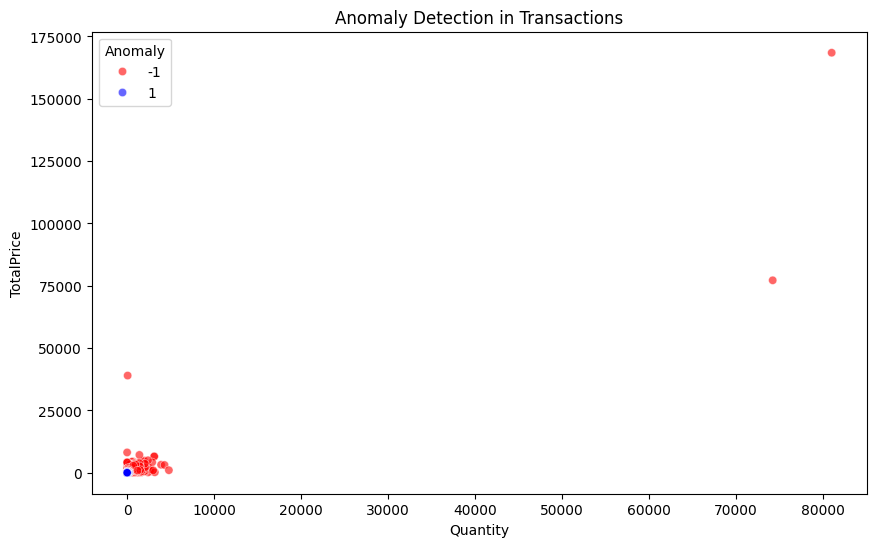

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Quantity', y='TotalPrice',
    hue='Anomaly', data=df, palette={1:'blue', -1:'red'},
    alpha=0.6
)
plt.title("Anomaly Detection in Transactions")
plt.show()